In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from statsmodels.tsa.stattools import coint

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
def Data_Preprocess(path):
    df = pd.read_excel(path)
    df1 = df.loc[:, ['产品简称', '单位净值', '累计净值', '复权累计净值', '今年以来收益率', '成立以来收益率', '成立以来最大回撤', '成立以来收益率(年化)',
       '成立以来波动率(年化)', '成立以来Sharpe比率', '成立以来Sortino比率', '成立以来Calmar比率', '成立以来信息比率', '成立以来投资胜率']]
    df2 = df1[~df1.isin(['--'])].dropna()
    df2.index = df2['产品简称']
    df2.drop(columns = '产品简称', inplace = True)
    for i in ['今年以来收益率', '成立以来收益率', '成立以来最大回撤','成立以来收益率(年化)', '成立以来波动率(年化)','成立以来投资胜率']:
        df2[i] = df2[i].str.strip('%').astype(float)/100
    df3 = (df2 - df2.mean(axis = 0))/(df2.std(axis = 0))
    return df2, df3

In [12]:
# data1是没有标准化的数据
# data2是标准化后的数据
data1, data2 = Data_Preprocess("管理期货.xls") 

In [13]:
data1

,单位净值,累计净值,复权累计净值,今年以来收益率,成立以来收益率,成立以来最大回撤,成立以来收益率(年化),成立以来波动率(年化),成立以来Sharpe比率,成立以来Sortino比率,成立以来Calmar比率,成立以来信息比率,成立以来投资胜率
产品简称,,,,,,,,,,,,,
七禾聚晨兴一号,0.6190,7.124,8.2183,5.5720,7.2182,0.4543,3.6393,0.8172,4.43,7.95,8.01,4.59,0.5850
中金量化-火星1号,1.5272,2.8306,3.3299,2.2018,2.3298,0.1576,2.1007,0.3987,5.23,11.18,13.33,4.68,0.6607
柚子东晟,0.9220,3.315,6.3517,1.8887,5.3517,0.4318,1.8329,0.7453,2.43,3.45,4.24,2.17,0.5690
具力信天翁1号,1.5819,5.0356,7.5523,1.0717,6.5515,0.5010,2.4000,0.6263,3.8,5.82,4.79,3.46,0.4494
蜂起量子一号,3.4508,3.4508,3.4508,0.9836,2.4508,0.1368,0.5510,0.2712,1.97,3.17,4.02,1.42,0.5151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
宁水王朝一号趋势量化增强,0.7681,0.7681,0.7681,-0.2765,-0.2319,0.4818,-0.2003,0.4425,-0.49,-0.44,-0.42,-0.53,0.4897
泰玥巽泽传统量化CTA,0.7501,0.7501,0.7501,-0.3094,-0.2500,0.3755,-0.1326,0.5546,-0.27,-0.52,-0.36,-0.88,0.3921
旭冕好奇未来一号,0.7065,1.437,1.2404,-0.3366,0.2403,0.4818,0.0971,0.8081,0.1,0.13,0.2,-0.02,0.4576


In [14]:
data2

,单位净值,累计净值,复权累计净值,今年以来收益率,成立以来收益率,成立以来最大回撤,成立以来收益率(年化),成立以来波动率(年化),成立以来Sharpe比率,成立以来Sortino比率,成立以来Calmar比率,成立以来信息比率,成立以来投资胜率
产品简称,,,,,,,,,,,,,
七禾聚晨兴一号,-1.577754,9.42385,8.491892,13.359283,8.542676,2.527629,9.642845,4.647740,2.5843,1.40572,0.712661,5.57821,2.387151
中金量化-火星1号,0.866969,2.34035,2.354801,5.105345,2.372259,0.050045,5.326095,1.624792,3.2199,2.22339,1.44417,5.69536,4.032267
柚子东晟,-0.762128,3.13954,6.148488,4.338533,6.186673,2.339743,4.574745,4.128385,0.995294,0.266551,0.194282,2.4283,2.039438
具力信天翁1号,1.014212,5.97829,7.655769,2.337623,7.701129,2.917596,6.165821,3.268813,2.08376,0.866512,0.269907,4.10739,-0.559715
蜂起量子一号,6.044980,3.36359,2.506583,2.121858,2.524992,-0.123645,0.978202,0.703822,0.629823,0.19567,0.164031,1.45208,0.868081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
宁水王朝一号趋势量化增强,-1.176402,-1.06248,-0.861385,-0.964246,-0.861264,2.757267,-1.129672,1.941172,-1.32465,-0.718195,-0.446474,-1.08607,0.316087
泰玥巽泽传统量化CTA,-1.224855,-1.09218,-0.883982,-1.044821,-0.884111,1.869612,-0.939731,2.750903,-1.14986,-0.738447,-0.438223,-1.54164,-1.804961
旭冕好奇未来一号,-1.342219,0.0411061,-0.268440,-1.111436,-0.265226,2.757267,-0.295276,4.582008,-0.855895,-0.573901,-0.361223,-0.422245,-0.381512


In [9]:
k = 4 # Num of clusters

In [15]:
def KMeans_Cluster(k, data1, data2):
    kmodel = KMeans(n_clusters = k)
    kmodel.fit(data2)
    r1 = pd.Series(kmodel.labels_).value_counts()  # 统计各类数量
    r2 = pd.DataFrame(kmodel.cluster_centers_)     # 找出聚类中心
    r2 = r2 * data1.std(axis = 0).values + data1.mean(axis = 0).values # 找出Normalization之前的聚类中心
    r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
    r.columns = list(data1.columns) + [u'类别数目'] 
    
    rr = pd.concat([data1, pd.Series(kmodel.labels_, index = data1.index)], axis = 1)  #详细输出每个样本对应的类别
    rr.columns = list(data1.columns) + [u'聚类类别'] #重命名表头
    return r, rr

In [18]:
r, rr = KMeans_Cluster(5, data1, data2)

In [19]:
r

,单位净值,累计净值,复权累计净值,今年以来收益率,成立以来收益率,成立以来最大回撤,成立以来收益率(年化),成立以来波动率(年化),成立以来Sharpe比率,成立以来Sortino比率,成立以来Calmar比率,成立以来信息比率,成立以来投资胜率,类别数目
0,1.238669,1.390987,1.415376,0.124407,0.413893,0.093476,0.189224,0.121588,1.603037,2.901852,2.979111,0.392963,0.489172,135
1,2.063205,2.504543,2.651857,0.422338,1.611181,0.230486,0.741419,0.342029,2.387143,4.449524,4.736190,1.685714,0.513100,21
2,1.012544,1.132293,1.117750,-0.023649,0.117840,0.203843,0.052329,0.195277,0.196429,0.441071,0.360625,-0.157143,0.448541,112
3,1.040967,5.158200,7.374100,2.844133,6.373800,0.462367,2.624067,0.729600,3.553333,5.740000,5.680000,3.406667,0.534467,3
4,1.083575,1.413325,1.459000,0.171625,0.458975,0.003725,0.199125,0.031950,6.137500,26.845000,54.592500,0.660000,0.503600,4


In [250]:
rr.to_excel("CTA_Kmeans.xlsx")

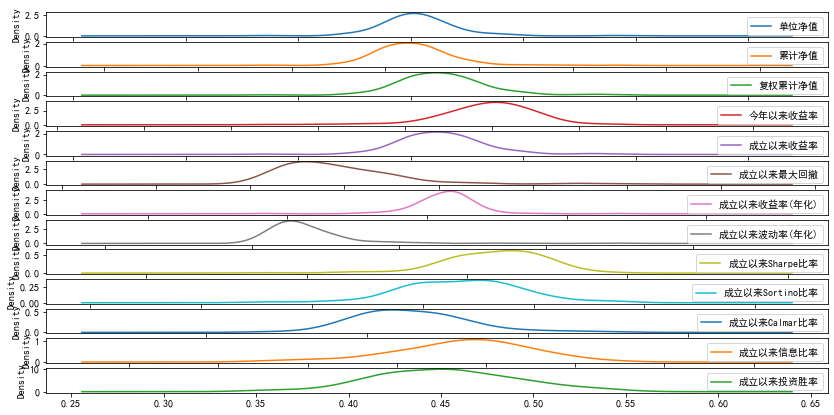

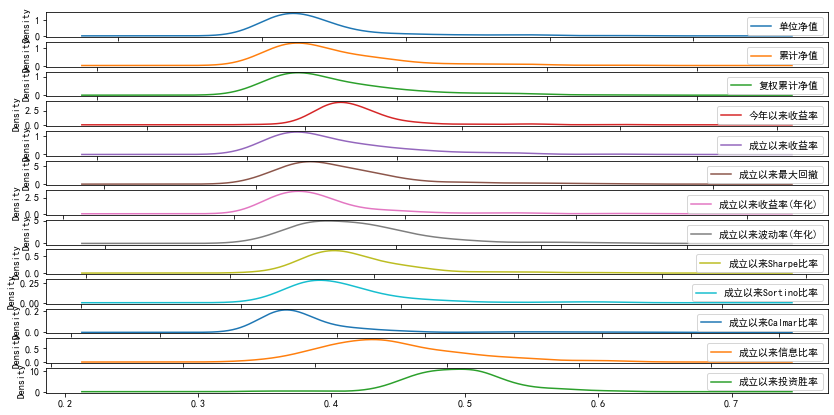

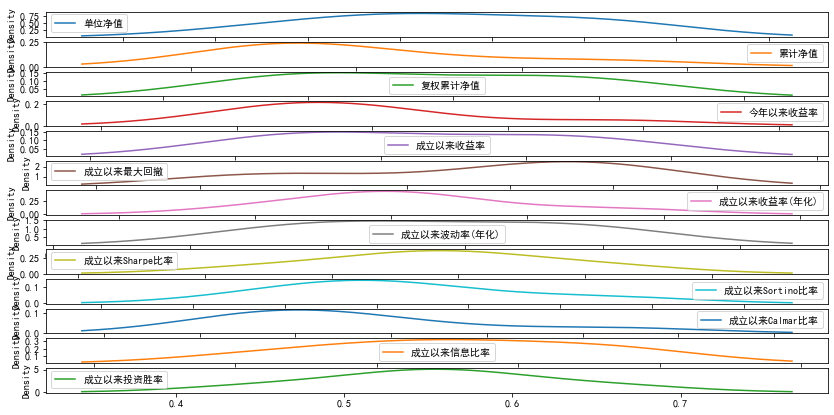

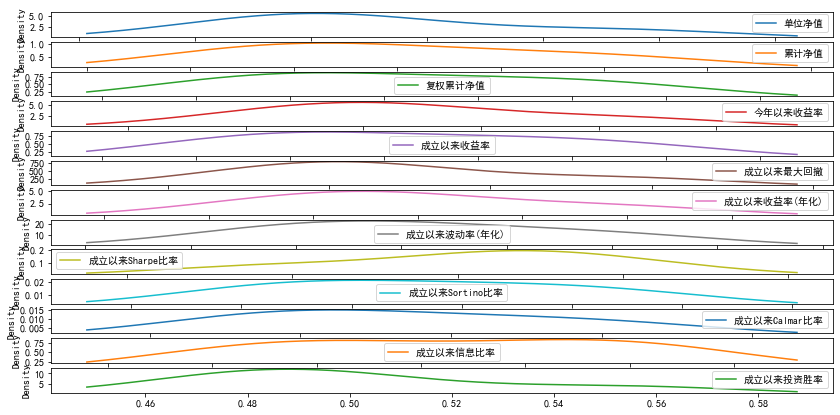

In [201]:
for i in range(0, k):
    data1[rr[u'聚类类别'] == i].plot(kind = 'kde', subplots = True, sharex = False, figsize = (14, 7))
    plt.savefig(str(i)+"K_means.png", dpi = 320)

In [256]:
data1, data2 = Data_Preprocess("股票量化.xls") 

In [257]:
r, rr = KMeans_Cluster(4, data1, data2)

In [258]:
rr.to_excel("Stock_Kmeans.xlsx")

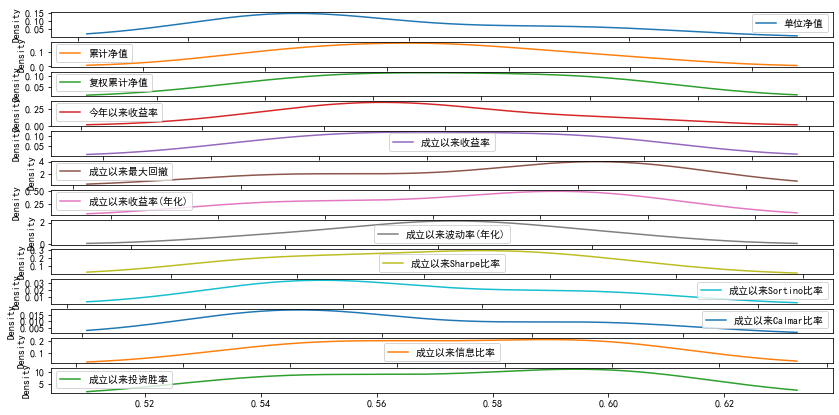

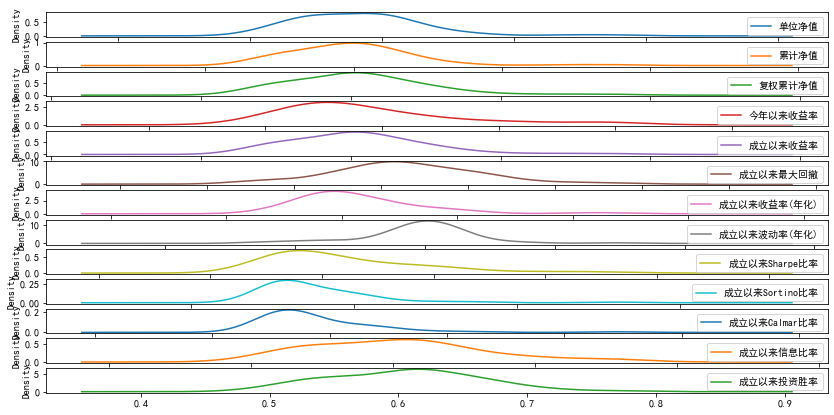

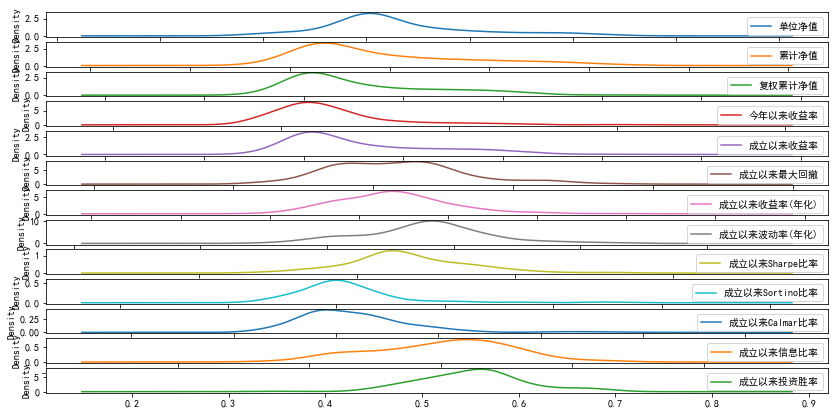

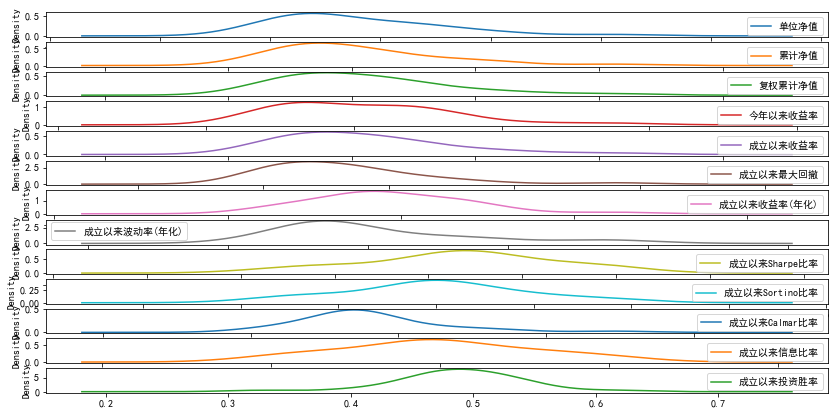

In [259]:
for i in range(0, k):
    data1[rr[u'聚类类别'] == i].plot(kind = 'kde', subplots = True, sharex = False, figsize = (14, 7))
    plt.savefig(str(i)+"K_means_Stock.png", dpi = 320)

In [269]:
data1, data2 = Data_Preprocess("套利策略.xls") 

In [270]:
r, rr = KMeans_Cluster(4, data1, data2)
rr.to_excel("Arbitrage_Kmeans.xlsx")

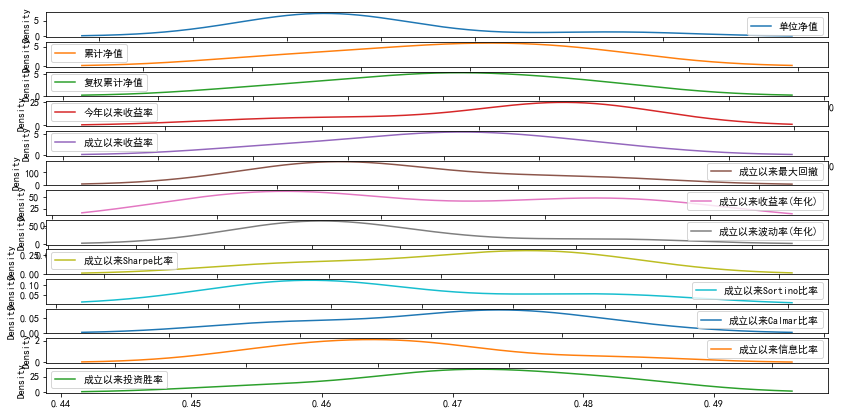

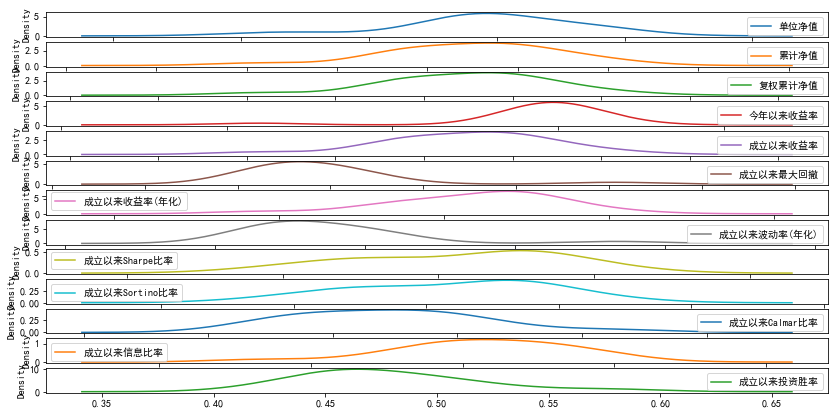

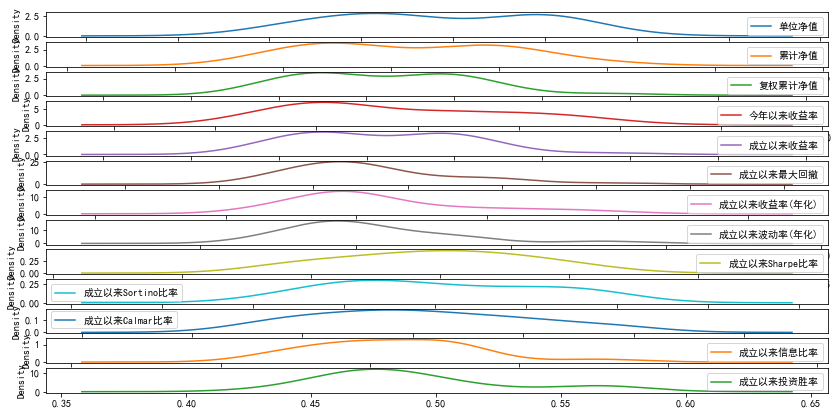

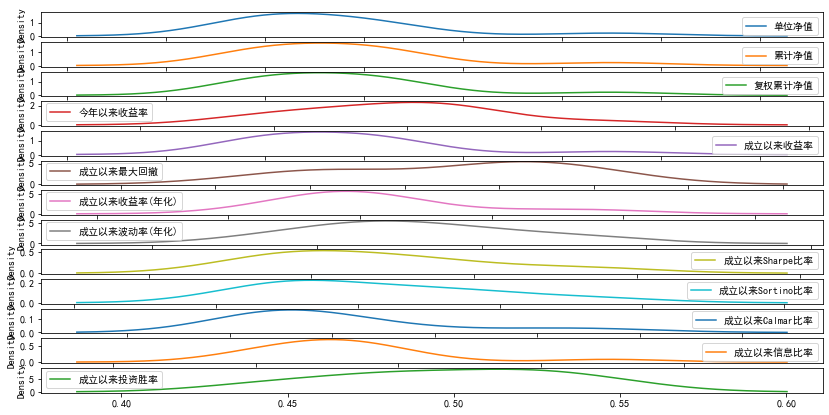

In [271]:
for i in range(0, k):
    data1[rr[u'聚类类别'] == i].plot(kind = 'kde', subplots = True, sharex = False, figsize = (14, 7))
    plt.savefig(str(i)+"K_means_Arbitrage.png", dpi = 320)

In [6]:
data1, data2 = Data_Preprocess("市场中性.xls") 

In [7]:
r, rr = KMeans_Cluster(4, data1, data2)
rr.to_excel("Neutral_Kmeans.xlsx")

In [11]:
r

,单位净值,累计净值,复权累计净值,今年以来收益率,成立以来收益率,成立以来最大回撤,成立以来收益率(年化),成立以来波动率(年化),成立以来Sharpe比率,成立以来Sortino比率,成立以来Calmar比率,成立以来信息比率,成立以来投资胜率,类别数目
0,1.104407,1.144600,1.147384,0.067732,0.147033,0.062265,0.076102,0.067513,1.094816,1.854081,2.384522,-0.075000,0.472787,272
1,1.197333,1.315822,1.335019,0.140881,0.334981,0.008670,0.159922,0.037674,4.452222,13.442963,21.728148,0.305926,0.476659,27
2,1.389066,1.519759,1.530100,0.293528,0.530094,0.161503,0.265759,0.213131,1.390313,2.300000,2.502813,0.743437,0.491094,32
3,3.765500,3.765500,3.765500,1.468550,2.765400,0.159100,0.704700,0.296650,2.325000,4.050000,4.495000,1.670000,0.507750,2


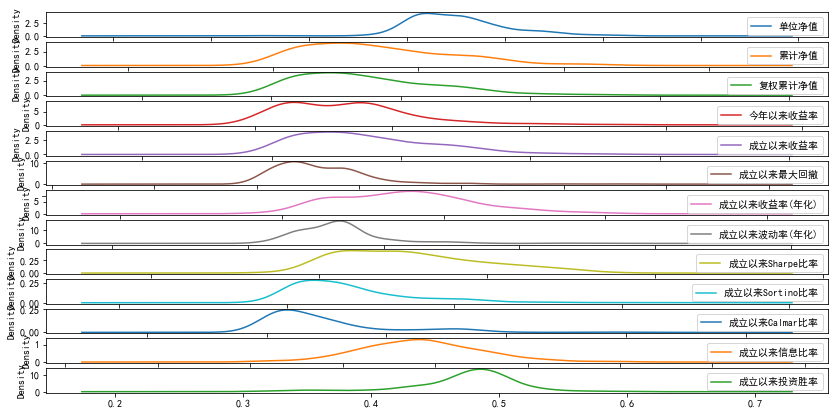

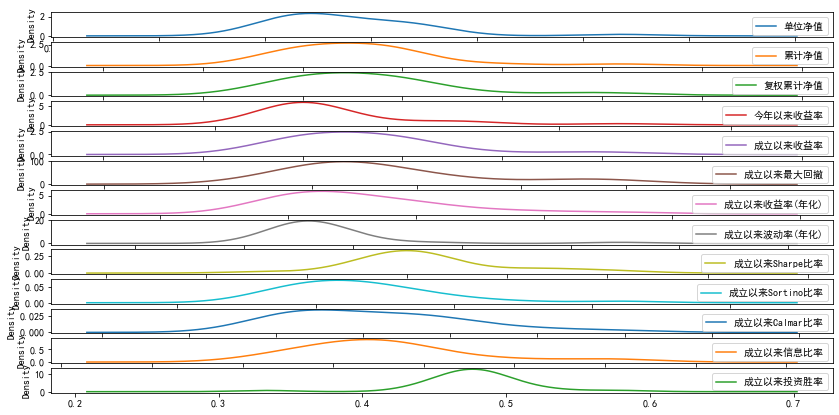

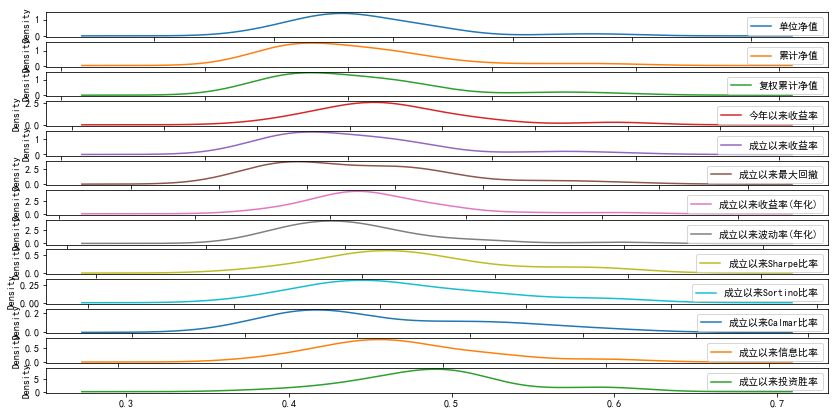

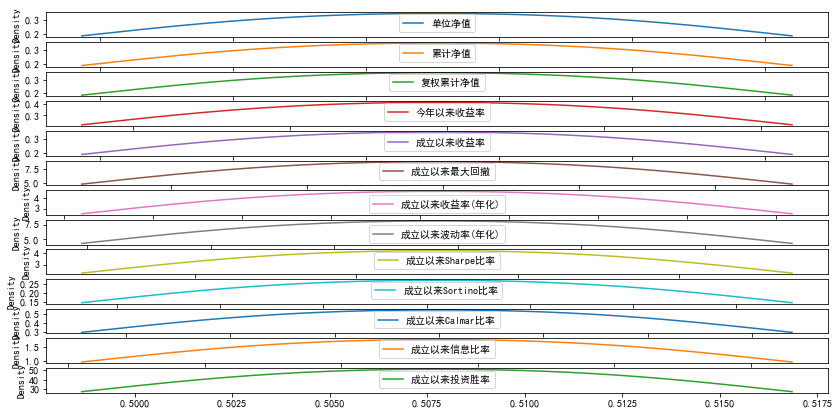

In [10]:
for i in range(0, k):
    data1[rr[u'聚类类别'] == i].plot(kind = 'kde', subplots = True, sharex = False, figsize = (14, 7))
    plt.savefig(str(i)+"K_means_Neutral.png", dpi = 320)